# Lecture Notes: Transfer Learning

## I. Introduction and Definition

Transfer Learning is a machine learning technique used to solve problems. It involves training a model on one dataset and then applying that model to run on a second, different dataset.

*   **Core Concept:** Transfer Learning focuses on **storing knowledge** gained while solving a previous problem and applying that knowledge to solve a **different but related problem**.
*   **Significance:** This method has become highly famous in the last five years. Leading figures in deep learning suggest that Transfer Learning **"will be the next big thing"** and is projected to advance machine learning in the industry beyond supervised learning.
*   **Inspiration:** Transfer Learning is inspired by real-life learning, where knowledge from one domain is applied to another (e.g., balancing skills learned on a bicycle making it easier to learn a motorcycle).

## II. Motivation: Why Use Transfer Learning?

Training custom Deep Learning (DL) models presents significant challenges, making Transfer Learning an appealing solution.

1.  **Data Hunger:** DL models are inherently **data hungry**, requiring a large amount of labeled data (e.g., 10,000 images) to train a custom model.
2.  **Cost and Effort of Labeling:** Acquiring large amounts of images is possible (e.g., by scraping), but manually labeling that data (e.g., identifying whether an image contains a cat or a dog) requires manual labor, is difficult, and is **costly**.
3.  **Time Required for Training:** Training DL models, especially on big datasets, takes a **lot of time**.

**Solution:** If training a custom DL model is difficult due to these issues, the common solution is to use **pre-trained models**.

## III. Pre-Trained Models and ImageNet

The foundation of Transfer Learning relies on models already trained on massive datasets.

*   **Definition:** A pre-trained model is a Convolutional Neural Network (CNN) model that has been trained on a large dataset.
*   **ImageNet:** A very large dataset of daily objects and animals used for training these models. It contains approximately **1.4 million images** belonging to **1000 classes** (including different dog and cat breeds).
*   **Competition:** ImageNet hosted a competition called ILSVRC (ImageNet Scale Visual Recognition Challenge). Models that won this competition (like VGG, ResNet, and InceptionNet) are highly effective and can be used in other projects.
*   **The Problem Transfer Learning Solves:** While pre-trained models are useful, they may not know the specific classes required for a new project (e.g., ImageNet's 1000 classes may not include "phone" or "tablet" needed for a specific classification task). Transfer Learning addresses how to leverage the pre-trained knowledge even when the new task involves unknown classes.

## IV. How Knowledge Transfer Works in CNNs

Transfer learning applies the knowledge learned from a previous task to a new task.

*   **CNN Architecture Breakdown:** A pre-trained CNN model (like VGG16) is typically divided into two main parts:
    1.  **Convolutional Base (Conv Base):** This part consists of the convolutional layers. Its function is to **extract features** and spatial information from the image pixels.
    2.  **Fully Connected Layers (FC Layers):** This part consists of the dense layers and the output layer. Its function is **classification**.
*   **Feature Extraction Progression:** The early convolutional layers extract **primitive features** (like edges). As the network progresses to deeper layers, it extracts more complex patterns and features (like shapes).
*   **Rationale for Transfer:** Since the primitive and general features of real-world objects are similar (they are "common"), the knowledge learned by the Conv Base on a large dataset like ImageNet is universally useful. Therefore, there is **no need to re-invent the wheel** by retraining those basic feature extraction layers. The core idea is to use the existing knowledge (the learned weights in the Conv Base) and apply it to the new task.

## V. Two Techniques for Transfer Learning

Transfer Learning is typically applied using one of two primary methods: Feature Extraction or Fine-Tuning.

### 1. Feature Extraction

This technique utilizes the pre-trained Conv Base as a fixed feature extractor.

*   **Process:**
    *   The original FC/Dance layers are removed.
    *   New Dance layers and a new output layer (e.g., a single neuron with sigmoid for binary classification) are attached.
    *   The **Conv Base is frozen** by setting its `trainable` value to `False`. The weights in the Conv Base do not change during training.
    *   Only the newly added FC layers are trained on the specific data.
*   **Use Case:** Feature Extraction is suitable when the new image classification task (e.g., Cat/Dog classification) has labels that are **similar** to the data the model was originally trained on (e.g., ImageNet, which already includes many animals).

### 2. Fine-Tuning

This technique allows for partial retraining of the pre-trained model.

*   **Process:**
    *   The FC layers are replaced, similar to Feature Extraction.
    *   Crucially, **the last few convolutional layers** of the Conv Base are **unfrozen** (`trainable=True`) and retrained, while the very early layers remain frozen.
    *   The entire path (unfrozen Conv layers + new Dance layers) is then trained on the new data.
*   **Use Case:** Fine-Tuning is necessary when the new problem is **very different** from the original dataset (e.g., classifying phones versus tablets, if ImageNet contained no relevant data for these specific objects). Since the knowledge of the later Conv layers might be too specific to the old task, unfreezing them allows the model to better adapt.
*   **Implementation Note:** When performing Fine-Tuning, it is advisable to use a very low learning rate with an optimizer like RMSprop.
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Feature extractition

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [17]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [18]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
conv_base.trainable = False

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8006 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [24]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 76s 291ms/step - accuracy: 0.8234 - loss: 0.4221 - val_accuracy: 0.8982 - val_loss: 0.2410
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.9154 - loss: 0.1977 - val_accuracy: 0.9051 - val_loss: 0.2446
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.9283 - loss: 0.1694 - val_accuracy: 0.8917 - val_loss: 0.2604
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9485 - loss: 0.1204 - val_accuracy: 0.9041 - val_loss: 0.2721
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.9606 - loss: 0.1019 - val_accuracy: 0.8987 - val_loss: 0.2886
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.9644 - loss: 0.0881 - val_accuracy: 0.8962 - val_loss: 0.3346
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.9794 - loss: 0.0569 - val_accuracy: 0.9001 - val_loss: 0.3459
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.9914 - loss: 0

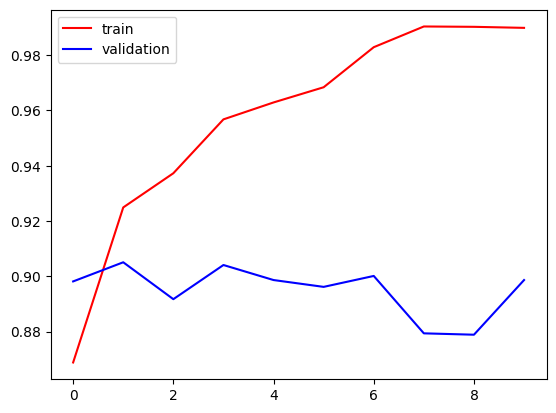

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Data Augmentation in feature extraction

In [28]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras import layers, models

data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(150,150,3)),    # random horizontal flips
    layers.RandomRotation(0.1),         # small rotations
    layers.RandomZoom(0.1),             # zoom
])

In [29]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8006 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [31]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [35]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
conv_base.trainable = False

In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - accuracy: 0.7730 - loss: 0.5486 - val_accuracy: 0.8828 - val_loss: 0.2646
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - accuracy: 0.8708 - loss: 0.3001 - val_accuracy: 0.8903 - val_loss: 0.2464
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.8848 - loss: 0.2725 - val_accuracy: 0.8774 - val_loss: 0.2929
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.8904 - loss: 0.2589 - val_accuracy: 0.8700 - val_loss: 0.3059
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.8947 - loss: 0.2506 - val_accuracy: 0.9120 - val_loss: 0.2249
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.8910 - loss: 0.2532 - val_accuracy: 0.9001 - val_loss: 0.2277
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.9027 - loss: 0.2262 - val_accuracy: 0.8967 - val_loss: 0.2407
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.9039 - loss: 0

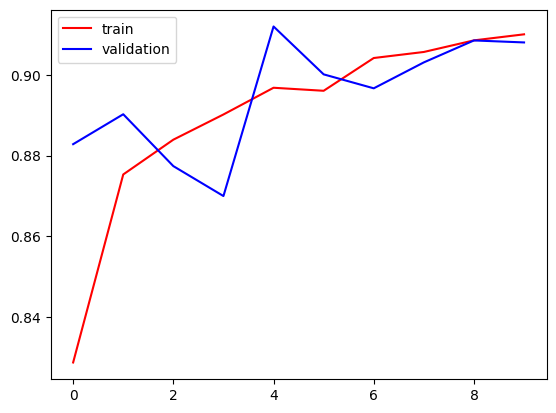

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Fine Tunning

In [41]:
# Fine tunning block5 conuvlations layers and dense layers only
# if a layer's parameters are set to retrain then layer below it will also be retrained

In [42]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_6 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [43]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [44]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8006 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [46]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 292ms/step - accuracy: 0.5163 - loss: 1.1418 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.4911 - loss: 0.6933 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.4897 - loss: 0.6933 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.4931 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.4959 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.4924 - loss: 0

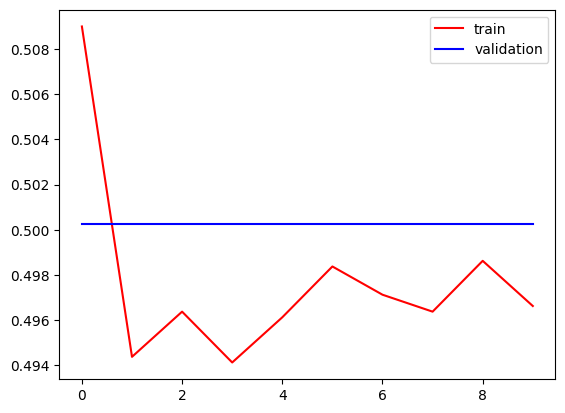

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Fine tunning with data aug

In [50]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras import layers, models

data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(150,150,3)),    # random horizontal flips
    layers.RandomRotation(0.1),         # small rotations
    layers.RandomZoom(0.1),             # zoom
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/dag_cot/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 8006 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [53]:
model=Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_6 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 131ms/step - accuracy: 0.4941 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.4931 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.4910 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.4888 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.4883 - loss: 0.6946 - val_accuracy: 0.4998 - val_loss: 37.6221
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.5020 - loss: 1.8118 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.4926 - loss: 

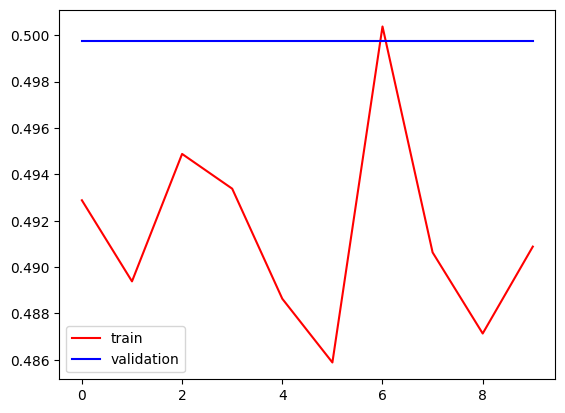

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()